# **Simulating Quantum Noise with Qiskit**

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 20.0 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=7f0db0a9939cfc6e93e1671f370f74f5a38e723a8c475efa02bb09d47960b5d8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


What is a noise model?

A noise model in quantum computing is a mathematical representation of the unwanted effects that can impact a quantum system.



Task: Simulate

1) depolarizing noise

2) phase damping

3) bit flipping

In quantum computing, the noise model refers to a mathematical representation of how a quantum system deviates from its ideal behavior due to imperfections in the physical implementation.

These imperfections arise from various factors like environmental interactions, hardware limitations, or imperfect gate operations.

Noise models are crucial for simulating quantum circuits and understanding how quantum algorithms will perform on noisy quantum computers, which is a key aspect of quantum error correction.

We'll use qiskit Aer noise module.

Three key classes are

NoiseModel(which stores a noise model used for noisy simulation.)

QuantumError (These can be applied:

After gate or reset instructions, Before measure instructions.)

ReadoutError(describes classical readout errors)

In [ ]:
# roughly approximates the errors one would encounter when using that (brisbane) backend

"""from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)"""

When adding a quantum error to a noise model, we must specify the type of instruction that it acts on and what qubits to apply it to.

There are two cases of quantum errors:

All-qubit quantum error

Specific qubit quantum error

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

Depolarizing error is a type of noise that can affect a quantum system, typically causing it to transition from a pure quantum state to a mixed state, thereby introducing uncertainty in quantum computations.


This error is commonly used in quantum simulations and models to mimic real-world imperfections in quantum devices, such as noise due to decoherence, gate imperfections, and interaction with the environment.

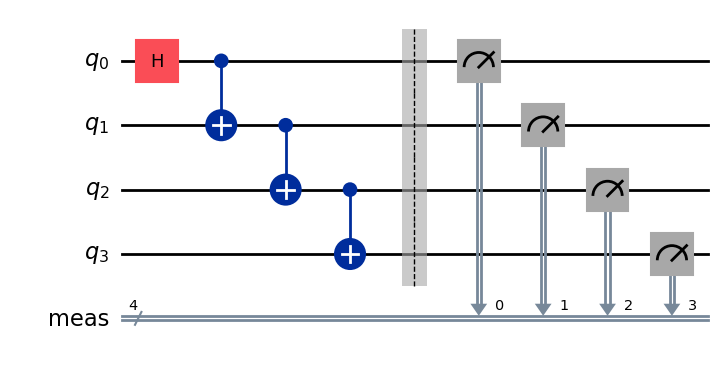

In [ ]:
#  step 1: let's build a 4 qubit ghz state
n = 4
circuit = QuantumCircuit(n)
circuit.h(0)
for i in range(n - 1):
  circuit.cx(i, i+1)

circuit.measure_all()
# print(circuit.draw('mpl'))
circuit.draw('mpl')

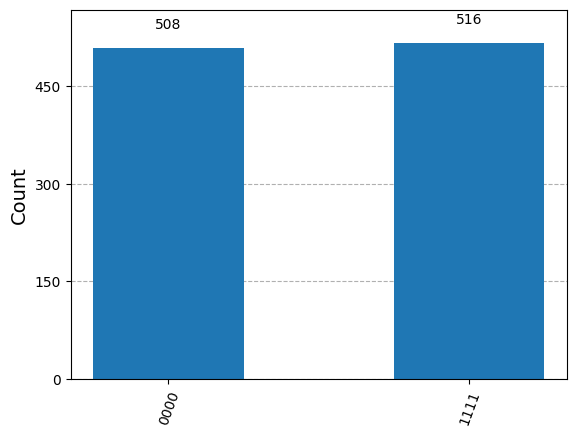

In [ ]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circuit).result()
counts = result_ideal.get_counts(0)
plot_histogram(result_ideal.get_counts(0))

In [ ]:
# create an empty NoiseModel
noise_model = NoiseModel()

# let's add depolarizing error to all single qubit gates

error = depolarizing_error(0.1, num_qubits=1)   # 10% noise

noise_model.add_all_qubit_quantum_error(error, ["u1", "u2", "u3", "h", "x", "y", "z", "s"])

print(noise_model)   #it will print noise model information


# p_error: 0.2 -> very noisy, 0.01 -> noise free system...

# let's add depolarizing error to specific single qubit gates
"""error = depolarizing_error(0.1, num_qubits=1)
noise_model.add_quantum_error(error, ["u1", "u2", "u3"], [0])
print(noise_model)"""

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 's', 'sx', 'u1', 'u2', 'u3', 'x', 'y', 'z']
  Instructions with noise: ['u2', 's', 'x', 'z', 'h', 'u3', 'u1', 'y']
  All-qubits errors: ['u1', 'u2', 'u3', 'h', 'x', 'y', 'z', 's']


'error = depolarizing_error(0.1, num_qubits=1)\nnoise_model.add_quantum_error(error, ["u1", "u2", "u3"], [0])\nprint(noise_model)'

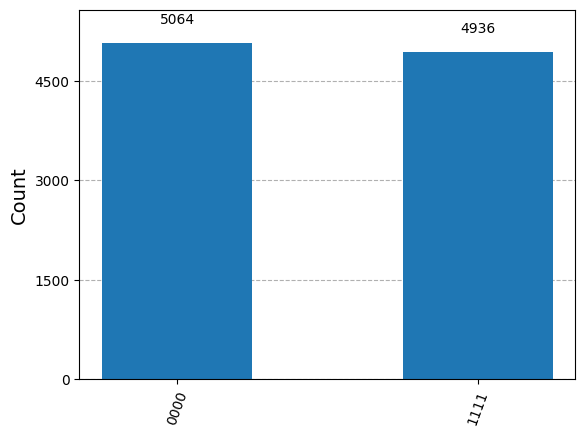

In [ ]:
# noisy simulator and execution
from qiskit import transpile
sim_ideal = AerSimulator(noise_model=noise_model, method='statevector')  #create a noisy simulator backend
circuit = transpile(circuit, sim_ideal)
result_ideal = sim_ideal.run(circuit, shots=10000).result()
counts = result_ideal.get_counts(0)
plot_histogram(result_ideal.get_counts(0))

Figure(914.831x451.5)


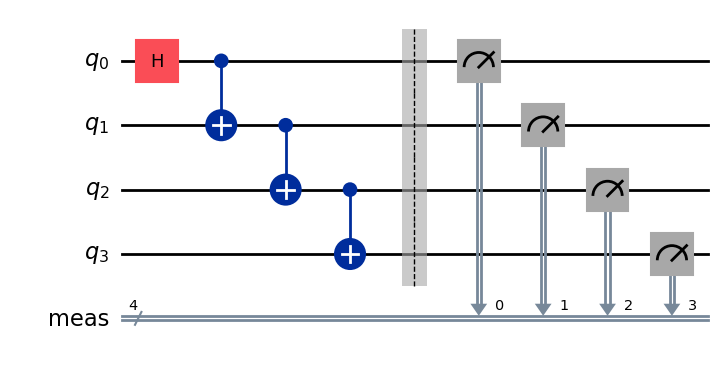

In [ ]:
#  step 1: let's build a 4 qubit ghz state
n = 4
circ = QuantumCircuit(n)
circ.h(0)
for i in range(n - 1):
  circ.cx(i, i+1)

circ.measure_all()
print(circuit.draw('mpl'))
circ.draw('mpl')

In [ ]:
"""from qiskit_aer.noise import NoiseModel, pauli_error

# Create a noise model with a bit-flip error on qubit 0
noisemodel_bitflip = NoiseModel()
bit_flip_error = pauli_error([("X", 0.1), ("I", 0.9)])  # 10% chance of bit flip
noisemodel_bitflip.add_all_qubit_quantum_error(bit_flip_error, ["id", "x", "h"])"""

In [ ]:
#  bit flip noise model
# example error probabilities

p_gate1 = 0.05
p_meas = 0.2
p_reset = 0.05 #5% chance of a bit-flip error during the reset operation.

error_gate = pauli_error([('X', p_gate1), ('I', 1 - p_gate1)])  # with probability 1−p, there is no error and with probability p, there is a bit-flip error.
# error_meas = readout_error([('X', p_meas), ('I', 1 - p_meas)])
error_meas = ReadoutError([[1 - p_meas, p_meas], [p_meas, 1 - p_meas]])
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_gate2 = error_gate.tensor(error_gate) #both qubits will experiencthe same error probability modeling noise on 2 qubit gates

#  let's add the errors to the noise model

noisemodel_bitflip = NoiseModel()
noisemodel_bitflip.add_all_qubit_quantum_error(error_gate, ['u1', 'u2', 'u3'])
noisemodel_bitflip.add_all_qubit_quantum_error(error_reset, ['reset'])
noisemodel_bitflip.add_all_qubit_readout_error(error_meas)

print(noisemodel_bitflip)  #print the noise model



NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'measure', 'u3', 'u1', 'reset']
  All-qubits errors: ['u1', 'u2', 'u3', 'reset', 'measure']


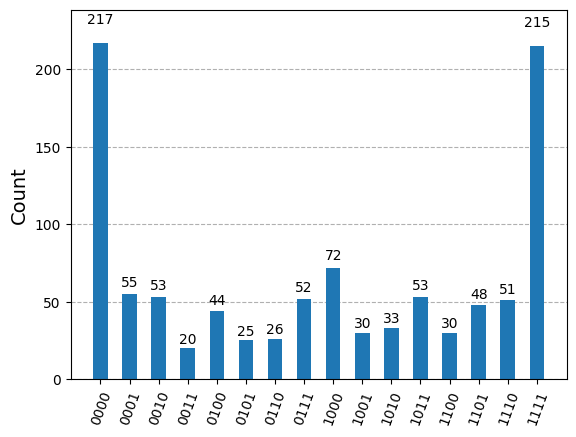

In [ ]:
# simulate the noise model
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noisemodel_bitflip)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
circ_tnoise = passmanager.run(circ)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

In [ ]:
# phase damping
from qiskit_aer.noise import phase_damping_error
n = 4
circ2 = QuantumCircuit(n)
circ2.h(0)
for i in range(n - 1):
  circ2.cx(i, i+1)

circ2.measure_all()
# print(circuit.draw('mpl'))
circ2.draw('mpl')

error = 0.5  #probability of phase damping
noisemodel_phasedamping = NoiseModel()

phasedamping_error = phase_damping_error(error, 1)
noisemodel_phasedamping.add_all_qubit_quantum_error(phasedamping_error, ["h"])
# noise_model.add_all_qubit_quantum_error(depolarizing_error(0.2, num_qubits=1), ["h", "cx"])

print(noisemodel_phasedamping)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['h']
  All-qubits errors: ['h']


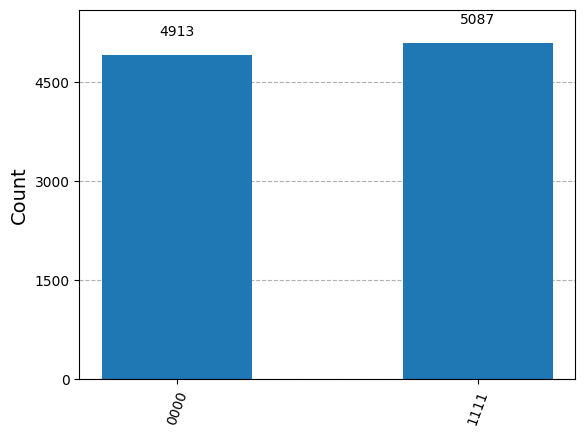

In [ ]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noisemodel_phasedamping)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
circ_tnoise = passmanager.run(circ2)

# Run and get counts
result_noise = sim_noise.run(circ_tnoise, shots=10000).result()
counts_noise = result_noise.get_counts()
plot_histogram(counts_noise)

In [ ]:
from qiskit_ibm_runtime import IBMQ
IBMQ.save_account('62c72edf4b8d2532ca8596d72102e90c72038ffa88fe2e5e6a556a70bfcaef41bde7f07cf4d0eca0fb8eddc2b3867e98eb295237ed20c87acea659173b386a89', overwrite=True)  # Run this only once
IBMQ.load_account()  # Load your IBMQ account


ImportError: cannot import name 'IBMQ' from 'qiskit_ibm_runtime' (/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/__init__.py)

#Updated version

{'1': 501, '0': 523}


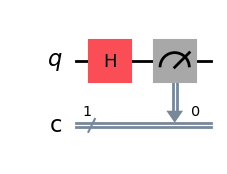

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
# from qiskit import NoiseModel, depolarizing_error

# Create a simple quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')
# Define a depolarizing noise model
noise_model = NoiseModel()
error = depolarizing_error(0.1, 1)  # 10% depolarizing noise
noise_model.add_all_qubit_quantum_error(error, ['h', 'measure'])

# Simulate the circuit
simulator = AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

print(result.get_counts())
qc.draw('mpl')

In [11]:
from qiskit_aer.noise import phase_damping_error

# Define a phase damping noise model
noise_model = NoiseModel()
error = phase_damping_error(0.2)  # 20% phase damping probability
noise_model.add_all_qubit_quantum_error(error, ['h', 'measure'])

simulator = AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

print(result.get_counts())


{'1': 530, '0': 494}


In [12]:
from qiskit_aer.noise import pauli_error

# Define a bit-flip noise model
noise_model = NoiseModel()
error = pauli_error([("X", 0.1), ("I", 0.9)])  # 10% bit-flip probability
noise_model.add_all_qubit_quantum_error(error, ['x', 'measure'])

simulator = AerSimulator(noise_model=noise_model)
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

print(result.get_counts())


{'1': 528, '0': 496}


In [13]:
# combining all the noise together
combined_noise_model = NoiseModel()
combined_noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])
combined_noise_model.add_all_qubit_quantum_error(phase_damping_error(0.2), ['h'])
combined_noise_model.add_all_qubit_quantum_error(pauli_error([("X", 0.1), ("I", 0.9)]), ['x'])

simulator = AerSimulator(noise_model=combined_noise_model)
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

print(result.get_counts())


{'0': 490, '1': 534}


In [14]:
# implementing shars code, which protects against bit and phase flip errors

def shor_code():
    qc = QuantumCircuit(9, 1)

    # Encoding
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)

    qc.cx(0, 3)
    qc.cx(1, 4)
    qc.cx(2, 5)

    qc.cx(3, 6)
    qc.cx(4, 7)
    qc.cx(5, 8)

    # Simulating a bit-flip error
    qc.x(4)  # Introduce an error

    # Decoding and error correction
    qc.cx(3, 0)
    qc.cx(4, 1)
    qc.cx(5, 2)

    qc.cx(6, 3)
    qc.cx(7, 4)
    qc.cx(8, 5)

    qc.ccx(3, 4, 0)
    qc.ccx(5, 6, 1)

    qc.measure(0, 0)

    return qc

shor_circuit = shor_code()
simulator = AerSimulator()
compiled_circuit = transpile(shor_circuit, simulator)
result = simulator.run(compiled_circuit).result()
print(result.get_counts())


{'0': 1024}


In [16]:
# more scalable error correction method SURFACE CODE

from qiskit import QuantumRegister, ClassicalRegister

def surface_code():
    qreg = QuantumRegister(5)
    creg = ClassicalRegister(1)
    qc = QuantumCircuit(qreg, creg)

    # Encoding
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)

    # Introduce an error
    qc.x(1)

    # Syndrome measurement
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.measure(3, 0)

    return qc

surface_circuit = surface_code()
simulator = AerSimulator()
compiled_circuit = transpile(surface_circuit, simulator)
result = simulator.run(compiled_circuit).result()
print(result.get_counts())


{'1': 1024}


In [17]:
#  let's apply shor's code to the noisy circuit

shor_circuit = shor_code()
noisy_simulator = AerSimulator(noise_model=combined_noise_model)

compiled_circuit = transpile(shor_circuit, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print(result.get_counts())


{'0': 868, '1': 156}


In [18]:
# let's compare results with and without error correction

# Without error correction
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)  # Introduce bit-flip
qc.measure(0, 0)

noisy_simulator = AerSimulator(noise_model=combined_noise_model)
compiled_circuit = transpile(qc, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print("Without error correction:", result.get_counts())

# With error correction (Shor code)
shor_circuit = shor_code()
compiled_circuit = transpile(shor_circuit, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print("With error correction:", result.get_counts())


Without error correction: {'1': 488, '0': 536}
With error correction: {'1': 137, '0': 887}


In [19]:
# noise simulation with corrected errors using shor's algorithm
def simulate(qc, noise_model=None):
    simulator = AerSimulator(noise_model=noise_model) if noise_model else AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    return result.get_counts()

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

print("Noisy Simulation:", simulate(qc, combined_noise_model))
print("With Error Correction:", simulate(shor_code(), combined_noise_model))


Noisy Simulation: {'0': 549, '1': 475}
With Error Correction: {'1': 144, '0': 880}


In [20]:
# Bell state under noise
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0, 1], [0, 1])

print("Bell State with Noise:", simulate(bell, combined_noise_model))
print("Bell State with Error Correction:", simulate(shor_code(), combined_noise_model))


Bell State with Noise: {'00': 493, '11': 531}
Bell State with Error Correction: {'0': 872, '1': 152}


Simulating Algorithms under noise and error correction

**Fidelity is a measure of how similar two quantum states are. It ranges from 0 to 1, where:**

Fidelity = 1 → The two states are identical (perfect match).


0 < Fidelity < 1 → The two states are partially similar, with higher values meaning more similarity.


Fidelity = 0 → The two states are completely different (orthogonal states).

In [ ]:
# fidelity to check whether the two states are

In [ ]:
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successfully uninstalled pydantic-2.10.3


In [ ]:
import qiskit
print(qiskit.__version__)


1.3.2


In [ ]:
!pip install qiskit --upgrade
